University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2025  
Luigi Acerbi  

# Problem Set 4: Combining inference with utility, and everything

- This homework problem set focuses on **Week 7** of the course, plus a recap of everything we have done in the course.
- This problem set is worth **30 points** in total (out of 100 for the full course).
- Check the submission deadline on Moodle! **Note that the deadline is just before midnight.**


## Submission instructions

Submission must be perfomed entirely on Moodle (**not** by email).
1. When you have completed the exercises, save the notebook.
2. Report your solutions and answers on Moodle ("*Problem set 4 answer return*").
3. Submit two files on Moodle ("*Problem set 4 notebook return*"): 
  - The notebook as `.ipynb`.
  - The same notebook downloaded as `.pdf.

#### How to save the notebook as PDF

There are various ways to save the Jupyter notebook as PDF, depending on the version of Jupyter notebook you have.

- In older versions, you should be able to select "File" > "Print Preview" and then print the page to PDF using your browser (remember to enter the Print Preview first).
- In more recent versions, you can select "File" > "Save and Export Notebook As" > "PDF".
  * For this to work, you may need to install [Pandoc](https://pandoc.org/installing.html) first.
  * Compiling to PDF might take a while.

## IMPORTANT

1. Do not share your code and answers with others. Contrary to the class exercises, which you can do with others, these problems are *not* group work and must be done individually.
2. It is allowed to use snippets of code from the lecture exercises and model solutions.
3. It is your responsibility to ensure that the notebook has fully finished running all the cells, all the plots view properly etc. before submitting it. However, the notebook should be runnable from scratch if needed ("Kernel > Restart & Run All").
4. Submit your work by the deadline.
5. Unless stated otherwise, please report your numerical answers in Moodle with full numerical precision (~14-15 digits), unless the answer is an integer.
6. If you are confused, think there is a mistake or find things too difficult, please ask on Moodle.

## References

- \[**MKG23**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2023.
- \[**AWV12**\] Acerbi L, Wolpert DM, Vijayakumar S. "Internal Representations of Temporal Statistics and Feedback Calibrate Motor-Sensory Interval Timing". *PLoS Computational Biology*, 2012. [Link](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002771)

In [1]:
# set-up -- do not change
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
npr.seed(1)

# Question 4.1 (6 pts)

> In this question, we will look at the optimal aim location when playing a modified game of darts.

Assume you are playing a game of darts, that is you need to throw a dart at a target a couple of meters away from you. For simplicity, we assume this is a modified version of the game in which the target board comprises of a series of vertical bands, so that only the horizontal landing location of the dart matters. Landing the dart on each different sector is associated with a different score.

We measure horizontal location starting from the center of the dart board ($0$ cm), with negative numbers meaning a position to the left of the center and positive numbers a position to the right of the center. We ignore the vertical position, assuming the bands are tall enough to be easy to hit on the vertical axis.

The sectors are characterized by their bounds on the board (start and end location) and their score, as follows:

- -25 to -15 cm: 15 points.
- -15 to -5 cm: 10 points.
- -5 to 5 cm: 20 points.
- 5 to 15 cm: 5 points.
- 15 to 25 cm: 25 points.

If the dart lands outside the board, you would get 0 points.

Given the aim location $\hat{s}$, we assume that due to motor noise, the actual *hit* location $r$ (where the dart actually lands) is distributed as follows:
$$
p(r|\hat{s}) = (1-\lambda) \mathcal{N}\left(r; \hat{s},\sigma^2_\text{motor}\right) + \lambda \mathcal{N}\left(r; \hat{s},\sigma^2_\text{lapse}\right),
$$
where $\sigma_\text{motor}$ is the standard spread location due to motor error and throwing variability. The novelty of this equation is that we also consider a probability $\lambda \in [0, 1]$ of lapsing (e.g., sneezing or being distracted by a friend while throwing), which produces a bad throw with a larger error $\sigma_\text{lapse}$. For this exercise, we assume $\sigma_\text{lapse} = 20$ cm.

Write a function that computes the expected score as a function of aim location $\hat{s}$ and task parameters $\left(\sigma_\text{motor}, \lambda, \sigma_\text{lapse}\right)$. Then, write a function that for given task parameters $\left(\sigma_\text{motor}, \lambda, \sigma_\text{lapse}\right)$, returns the optimal aim location $s^\star$ (the aim point which produces the maximum expected score).

- a) For $\sigma_\text{motor} \in [2, 10]$ cm and $\lambda \in [0, 0.2]$, what are the rightmost (maximum) and leftmost (minimum) locations for $s^\star$?
- b) For $\lambda = 0.1$, plot $s^\star$ as a function of $\sigma_\text{motor}$, for $\sigma_\text{motor} \in [2, 10]$ cm. You should see an interesting switch of optimal strategy. Around which value of $\sigma_\text{motor}$ the optimal strategy switches and it becomes more convenient to throw the dart to the left of the center as opposed to the right of the center?

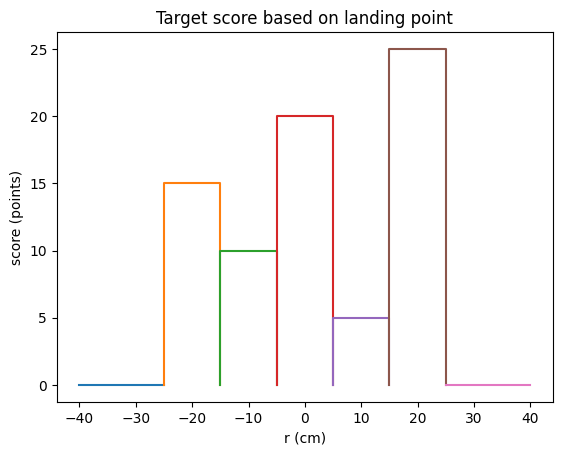

In [2]:
bands = [-np.inf,-25,-15,-5,5,15,25,np.inf]
scores = [0,15,10,20,5,25,0]

# Plot target score

s = np.linspace(-30,30,200)
for index, band in enumerate(scores):
    a = np.maximum(bands[index], -40)
    b = np.minimum(bands[index+1], 40)
    plt.plot((a,a,b,b),np.array((0,scores[index],scores[index],0)))

plt.xlabel('r (cm)')
plt.ylabel('score (points)')
plt.title('Target score based on landing point')
plt.show()

minimum s_star: -1.9769769769769745
maximum s_star: 19.894894894894897


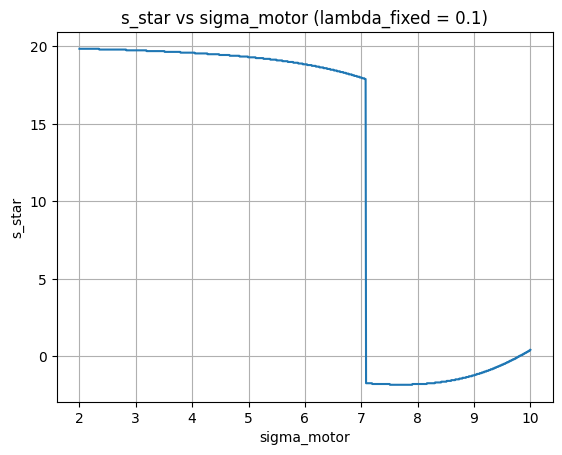

strategy switches at sigma_motor ≈ 7.077077077077077


In [ ]:
sigma_lapse = 20

def get_score(r):
	aux = np.zeros_like(r)
	for index, band in enumerate(scores):
		aux[(r >= bands[index]) & (r <= bands[index + 1])] = scores[index]
	return aux

def expected_score(s_hat, sigma_motor, lambda_param):
    Nr = 2**10+1
    lower_bound = -30
    upper_bound = 30
    r = np.linspace(lower_bound, upper_bound, Nr)
    scores = get_score(r)
    
    posterior = (1 - lambda_param) * sps.norm.pdf(r.reshape(-1, 1), s_hat, sigma_motor) + \
          lambda_param * sps.norm.pdf(r.reshape(-1, 1), s_hat, sigma_lapse)
    
    dx = r[1] - r[0]
    return sp.integrate.romb(scores.reshape(-1, 1) * posterior, dx=dx, axis=0)

def find_optimal_aim(sigma_motor, lambda_param):
    aim_points = np.linspace(-25, 25, 1000)
    scores = expected_score(aim_points, sigma_motor, lambda_param)
    return aim_points[np.argmax(scores)]

sigma_motor_range = np.linspace(2, 10, 500)
lambda_range = np.linspace(0, 0.2, 5)

optimal_aim_range = np.array([find_optimal_aim(sigma, lambda_) for sigma in sigma_motor_range for lambda_ in lambda_range])
min_s_star = np.min(optimal_aim_range)
max_s_star = np.max(optimal_aim_range)
print(f"minimum s_star: {min_s_star}")
print(f"maximum s_star: {max_s_star}")

lambda_fixed = 0.1
s_star_values = np.array([find_optimal_aim(sigma, lambda_fixed) for sigma in sigma_motor_range])

plt.plot(sigma_motor_range, s_star_values)
plt.xlabel("sigma_motor")
plt.ylabel("s_star")
plt.title("s_star vs sigma_motor (lambda_fixed = 0.1)")
plt.grid()
plt.show()

switch_index = np.where(np.diff(np.sign(s_star_values)))[0]
if switch_index.size > 0:
    switch_value = sigma_motor_range[switch_index[0]]
    print(f"strategy switches at sigma_motor ≈ {switch_value}")


# Question 4.2 (6 pts)

> In this question, we will infer the empirical loss function of an observer in a task based on their responses.

In each trial of this experiment, the participant is shown a cloud of dots on a screen. The horizontal location of each dot is drawn from the following mixture distribution:
  $$
  p(s; h) = 0.8 \mathcal{N}\left(s; 0, 0.2^2\right) + 0.2 \mathcal{N}\left(s; h, 0.2^2\right)
  $$
  where $h$ is a parameter controlled by the experimenter, and is changed from trial to trial. The horizontal location is measured in normalized screen units $s \in [-1, 1]$, where $0$ is the center of the screen. 
- Along the vertical axis, the dots show a small jitter along the center of the screen (we ignore the vertical displacement).
- In each trial, the subject is asked to report the horizontal position of the *center* of the cloud of dots. The word "center" is ambiguous, as we could be asking for the mean, the median, or other [measures of central tendency](https://en.wikipedia.org/wiki/Central_tendency). The question is what the subject would naturally report. We assume the subject reports the estimate $\hat{s}$ that minimizes their expected loss. 
- For the purpose of this question, we also assume that the observer's loss function takes the parametric form
  $$
  \mathcal{L}_\alpha\left(s^\prime, s \right) = \left| s^\prime - s \right|^\alpha
  $$
  which is the loss for reporting $s^\prime$ for a dot position $s$. 
- In each trial, the expected loss is the expectation of the loss over the presented dot locations, $p(s; h)$.
- A sequence of trials is thus represented by the trial design (the presented distribution of dots, parameterized by $h_t$) and the observer's responses $\hat{s}_t$ in each trial $t$.
- For simplicity, here we assume that there is no response noise.

------------------

- a) First, as a sanity check, compute the *expected loss* assuming $\alpha = 1$, a fixed value of $h = 0.3$ and a candidate estimate $s^\prime = 0.5$. In formulas:
$$
\mathbb{E}\left[ \mathcal{L}_\alpha\left(s^\prime, s \right) \right] = \int p(s; h) \mathcal{L}_\alpha\left(s^\prime, s \right) ds
$$
  where you should replace the pdf and the loss with the definitions provided in the text of the exercise.
  Report the expected loss for this specific case in Moodle.
- b) Now, as a further sanity check, for same case $\alpha = 1$ and $h = 0.3$, report the *optimal estimate*, that is the estimate $s^\star$ that minimizes the expected loss. In formulas:
$$
s^\star = \arg\min_{s^\prime} \mathbb{E}\left[ \mathcal{L}_\alpha\left(s^\prime, s \right) \right]
$$
  Report the optimal estimate for this specific case in Moodle.
- c) Given the data reported below, infer the exponent $\alpha \ge 0$ of the loss function that best describes the subject behavior. Do so by finding the $\alpha$ that minimizes the total squared error between the model predictions (assuming the observer follows Bayesian decision theory) and the data, summed over trials. Report the best estimate for $\alpha$ in Moodle (error tolerance $\pm 0.1$).

*Notes*: 
- Assume that the horizontal location $s \in [-1, 1]$ (i.e., within the width of the screen).
- In real data, the observer's responses would be corrupted by decision and motor noise, which would make inferring the loss function still more complex. For example, it would be better to use Bayesian inference to infer a posterior over $\alpha$, as opposed to a point estimate. Still, the logic would be the same.

In [16]:
# For part c - trial parameters h_t and subject's responses s_hat_t

h_t = np.array([-0.0663824 ,  0.17625959, -0.3999085 , -0.15813394, -0.28259529,
       -0.32612912, -0.25099183, -0.12355142, -0.08258602,  0.03105339,
       -0.06464439,  0.1481756 , -0.2364382 ,  0.30249395, -0.37808993,
        0.13637401, -0.06615616,  0.04695186, -0.28769045, -0.24151881])
s_hat_t = np.array([-0.0125   ,  0.034375 , -0.0734375, -0.03125  , -0.0546875,
       -0.0609375, -0.0484375, -0.025    , -0.0171875,  0.00625  ,
       -0.0125   ,  0.0296875, -0.0453125,  0.0578125, -0.0703125,
        0.0265625, -0.0125   ,  0.009375 , -0.0546875, -0.046875 ])

In [22]:
Ns = 2**12+1
lower_bound = -1
upper_bound = 1
s_grid = np.linspace(start = lower_bound, stop = upper_bound, num = Ns)
s_prime_grid = np.linspace(start = lower_bound, stop = upper_bound, num = Ns)

h = 0.3
s_prime_fixed = 0.5
alpha = 1


def loss_function(s_prime, s, alpha):
	s_prime = np.atleast_1d(s_prime)[:, np.newaxis]  # Convert s_prime to a column vector
	s = np.asarray(s)
	return np.abs(s_prime - s) ** alpha

def expected_loss(s_prime, s, h, alpha):
	prior = 0.8 * sps.norm.pdf(s, 0, 0.2) + 0.2 * sps.norm.pdf(s, h, 0.2)
	integrand = loss_function(s_prime = s_prime, s = s, alpha = alpha) * prior
	ds = s.flatten()[1] - s.flatten()[0]
	return sp.integrate.romb(integrand, dx = ds)

def optimal_estimate(s_candidates, h, alpha):
	losses = expected_loss(s_prime_grid, s_grid, h, alpha)
	return s_candidates[np.argmin(losses)] 

alpha_candidates = np.linspace(0, 2, 100)
errors = []

print("part a)")
print(expected_loss(s_prime_fixed, s_grid, h = 0.3, alpha = 1))

print("part b)")
print(s_grid[ np.argmin(expected_loss(s_prime_grid, s_grid, h, alpha)) ])

for alpha in alpha_candidates:
	s_star_values = np.array([optimal_estimate(s_prime_grid, h, alpha) for h in h_t])
	error = np.sum((s_star_values - s_hat_t) ** 2)
	errors.append(error)

print("part c)")
best_alpha = alpha_candidates[np.argmin(errors)]
print(f"best estimated alpha: {best_alpha}")

part a)
[0.44728048]
part b)
0.05029296875
part c)
best estimated alpha: 1.696969696969697


# Question 4.3 (18 pts)

> For this question, which amounts to a small modelling and model fitting project, we will put together several topics seen in the course. Using the data of the sensorimotor timing experiment \[**AWV12**\] that we encountered several times in this course, we will use a Bayesian observer model to recover the observer's prior from their responses.

We analyze the data with the `gaussianmixobserverwithlapse` model, defines as follows:

- We assume the observer builds a (mismatched) Gaussian prior with two components:
  $$p(s) = w_\text{prior} \mathcal{N}\left(s| \mu_{\text{prior}}, \sigma_{\text{prior}, 1}^2 \right) + 
  \left(1 - w_\text{prior} \right)\mathcal{N}\left(s| \mu_{\text{prior}}, \sigma_{\text{prior}, 2}^2 \right)$$ 
  over the stimuli (time intervals). We assume the two components have the same mean $\mu_\text{prior}$, but different weights ($w_\text{prior}$ and $1 - w_\text{prior}$) and standard deviations ($\sigma_{\text{prior}, 1}$ and $\sigma_{\text{prior}, 2}$).
- We assume that the measurement distribution and likelihood are also Gaussian, $p(x|s) = \mathcal{N}\left(x| s, \sigma^2 \right)$.
- The observer uses the *posterior mean* estimator for the value of the stimulus, $\hat{s}_\text{PM}$.
- Gaussian motor response noise is added to the estimate, $p(r|\hat{s}) = \mathcal{N}\left(r| \hat{s}, \sigma_\text{motor}^2 \right)$. For this exercise, we assume that $\sigma_\text{motor} = 70$ ms for all subjects.
- In each trial, the observer lapses with probability $\lambda$ (the *lapse rate*), in which case the response is drawn from $p_\text{lapse}(r) = \text{Uniform}\left(r; 0, 1500 \right)$ ms. Otherwise, the observer responds normally (according to $p(r|\hat{s})$ described above) with probability $1 - \lambda$. 
- The free parameters of this model are $\mathbf{\theta} = \left(\sigma, \lambda, w_\text{prior}, \mu_\text{prior}, \sigma_{\text{prior}, 1}, \sigma_{\text{prior}, 2} \right)$.

Note that the parameters $w_\text{prior}, \mu_\text{prior}, \sigma_{\text{prior}, 1}, \sigma_{\text{prior,2}}$ model the subject's prior. In other words, we can use the estimates of these parameters to visualize what the subject's prior might look like.

-----------------------------------------------

For this analysis, we will separately consider all subjects, but for all subjects' datasets we will discard the first session, to ensure that subjects have achieved enough training in the task. We provide below example code that retrieves the stimuli $\mathbf{s}$ and responses $\mathbf{r}$ for a subject, withouth the first session.

- a) As a sanity check, compute the log-likelihood of model parameter $\theta_\star = \left(\sigma = 100, \lambda = 0.01, w_\text{prior} = 0.5, \mu_\text{prior} = 787, \sigma_{\text{prior}, 1} = 100, \sigma_{\text{prior}, 2} = 120 \right)$ for the dataset of subject 5 (having removed the first session) and report the result in Moodle.
- b) Separately fit the `gaussianmixobserverwithlapse` model to all the six subjects' datasets (removing the first session from all data) via maximum-likelihood estimation. For each subject, report the maximum log-likelihood value in Moodle.
- c) Consider now the `idealgaussianobserverwithlapse` observer model. The `idealgaussianobserverwithlapse` is the same as the model above with the difference that the observer's prior is a single Gaussian $p(s) = \mathcal{N}\left(s | \mu_\text{prior}, \sigma^2_\text{prior} \right)$ with $\mu_\text{prior} = 787.5$ ms and $\sigma_{\text{prior}} = 128.1$ ms. As above, we fix $\sigma_\text{motor} = 70$ ms. The `idealgaussianobserverwithlapse`  model has two free parameters, $\theta = \left(\sigma, \lambda \right)$. As a sanity check, compute the log-likelihood of model parameter $\theta_\star = \left(\sigma = 100, \lambda = 0.01\right)$ for the dataset of subject 5 (having removed the first session) and report the result in Moodle.
- d) Separately fit the `idealgaussianobserverwithlapse` model to all the six subjects' datasets (removing the first session from all data) via maximum-likelihood estimation.  For each dataset, separately compute the AIC and BIC for the two models `gaussianmixobserverwithlapse` and `idealgaussianobserverwithlapse`. Sum the AIC and BIC values across subjects to find the sum AIC (or BIC) of the two models. Report the summed AIC (and BIC) for the two models separately in Moodle.
- e) Which model is best, according to the metrics, and why do you think it is the case? Discuss your findings (max 300 words).

*Hints*:
- Both in parts (a) and (c), the log-likelihoods that you find should be between $-6000$ and $-5800$.
- There is an analytical solution for the posterior (and $\hat{s}_\text{PM}$), but there is no analytical solution for the response distribution $p(r|s)$, so you will need to use numerical integration at least to compute the response distribution.
- Finding the maximum-likelihood solution can be difficult as the optimization landscape is nontrivial. As a sanity check, verify that your solutions are consistent across different runs. If not, you might need to run additional optimization runs to increase the chance of finding the global optimum - possibly of the order of ten or even more.
- Beware that running multiple optimizations for all subjects will take quite some time (easily 30-60 minutes overall, possibly more - depending on your code, your computer, and how many runs you do). Model fitting is time consuming!
- Remember that you can ask questions in the Moodle discussion forum if you need further hints.
- For this problem, you are given unlimited attempts in Moodle.

In [78]:
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

# Load data of Experiment 3 of [AWV12] from .csv file to a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lacerbi/prob-cog-mod-files/main/data/awv12_exp3.csv')

# Remove unused columns
df.drop(df.columns[[6, 7, 8]], axis=1, inplace=True)

# Remove rows with NaNs
df.dropna(axis=0, inplace=True)

# Example code to take the data of subject 1, excluding the first session
subject = 1
s = np.array(df['Stimulus (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])
r = np.array(df['Response (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])

In [79]:
sigma_motor = 70

def gaussian_response(s,theta):
	"""Compute mean and standard deviation of p(r|s; theta)."""
	# Unpack parameter vector theta
	mu_prior = theta[0]
	sigma_prior = theta[1]
	sigma = theta[2]
	sigma_motor = theta[3]
	# Compute mean and std of the response
	w = sigma_prior**2/(sigma_prior**2 + sigma**2)    
	mu_resp = w*s + (1-w)*mu_prior
	sigma_resp = np.sqrt(w**2*sigma**2 + sigma_motor**2)
	return mu_resp, sigma_resp

def posterior_mean(x, sigma, mu_s, sigma_s1, sigma_s2, w_s):
	L1 = w_s * sps.norm.pdf(x, mu_s, np.sqrt( sigma**2 + sigma_s1**2 ))
	L2 = ( 1 - w_s ) * sps.norm.pdf(x, mu_s, np.sqrt( sigma**2 + sigma_s2**2 ))

	mu_post_1, _ = gaussian_response(x, (mu_s, sigma_s1, sigma, 0))
	mu_post_2, _ = gaussian_response(x, (mu_s, sigma_s2, sigma, 0))

	return (L1 / (L1 + L2)) * mu_post_1 + (L2 / (L1 + L2)) * mu_post_2

def log_likelihood(theta, data):
	s = data[:, 0]
	r = data[:, 1]
	sigma, lapse, w_s, mu_s, sigma_s1, sigma_s2 = theta
	Nx = 2 ** 10 + 1
	lower_bound = s.min() - 5 * sigma
	upper_bound = s.max() + 5 * sigma
	x_grid = np.linspace(lower_bound, upper_bound, Nx)
	dx = x_grid[1].flatten() - x_grid[0].flatten()
	
	integral = sp.integrate.romb(
		sps.norm.pdf(
				x_grid
				,s.reshape(-1, 1)
				,sigma
			) * sps.norm.pdf(
				r.reshape(-1, 1)
				,posterior_mean(x_grid, sigma, mu_s, sigma_s1, sigma_s2, w_s)
				,sigma_motor
		), dx=dx)
	
	likelihoods = (1 - lapse) * integral + lapse * (1 / 1500)
	return np.sum(np.log(likelihoods))

In [80]:
subject = 5
s = np.array(df['Stimulus (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])
r = np.array(df['Response (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])

print("part a)")
result = log_likelihood((100, 0.01, 0.5, 787, 100, 120), np.column_stack((s, r)))
print("sanity check subject 5 log likelihood:", result)

part a)
sanity check subject 5 log likelihood: -5971.377804064764


In [81]:
try: 
    from pybads.bads import BADS
    method = 'BADS'
except:
    method = 'L-BFGS-B'

In [82]:
np.set_printoptions(suppress=True)

In [83]:
aic_list = list()
bic_list = list()

In [84]:
print("part b)")
lower_bounds = np.array([0.001, 0, 0., 650, 0.001, 0.001])
upper_bounds = np.array([400, 1, 1, 900, 400, 400])

num_runs = 3

def multioptimize(target_fun,lower_bounds,upper_bounds,plausible_lower_bounds,plausible_upper_bounds,num_runs=3,method='L-BFGS-B'):
	"""Simple function for multi-start optimization."""
	# Run num_runs optimization runs from different starting points    
	num_params = lower_bounds.shape[0]
	theta_res = np.zeros((num_runs,num_params))
	nll_res = np.zeros(num_runs)    
	
	for index in range(num_runs):
		if index == 0:
			theta0 = 0.5*(plausible_lower_bounds + plausible_upper_bounds)
		else:
			theta0 = np.random.uniform(low=plausible_lower_bounds,high=plausible_upper_bounds)
		
		if method == 'L-BFGS-B':
			bounds = sp.optimize.Bounds(lower_bounds,upper_bounds,True) # Set hard bounds
			res = sp.optimize.minimize(target_fun, theta0, method='L-BFGS-B', bounds=bounds)
			nll_res[index] = res.fun
			theta_res[index] = res.x
		elif method == 'BADS':
			bads = BADS(target_fun, theta0, lower_bounds, upper_bounds, plausible_lower_bounds, plausible_upper_bounds)
			res = bads.optimize()
			nll_res[index] = res.fval
			theta_res[index] = res.x
		else:
			error('Unknown optimization method.')
		print('Run {}: log-likelihood {}'.format(index, -nll_res[index]))
		
	# Pick the best solution
	idx_best = np.argmin(nll_res)
	nll_best = nll_res[idx_best]
	theta_best = theta_res[idx_best]        
	return nll_best,theta_best
aic_list = list()
for subj in np.unique(df['Subject id']):
	s = np.array(df['Stimulus (ms)'][(df['Subject id'] == subj) & (df['Session id'] > 1)])
	r = np.array(df['Response (ms)'][(df['Subject id'] == subj) & (df['Session id'] > 1)])

	target_fun = lambda theta_: -log_likelihood(theta_, np.column_stack((s, r)))

	nll_best,theta_best = multioptimize(
		target_fun
		,lower_bounds
		,upper_bounds
		,lower_bounds
		,upper_bounds
		,num_runs
		,method=method
	)

	print(f"The maximum-likelihood solution for subject {subj}  is theta_ML = {theta_best} with log-likelihood: {-nll_best}")
	aic_list.append(2 * 6 - 2 * (-nll_best))
	bic_list.append(6 * np.log(len(s)) - 2 * (-nll_best))

part b)
Run 0: log-likelihood -11519.76822570033
Run 1: log-likelihood -11517.806991192938


/tmp/ipykernel_4013008/1309567271.py:47: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(likelihoods))
/home/percy/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Run 2: log-likelihood -11949.408593987384
The maximum-likelihood solution for subject 1  is theta_ML = [ 26.42351466   0.           0.99999945 784.49091794  30.14514513
 141.51852176] with log-likelihood: -11517.806991192938
Run 0: log-likelihood -5569.101435136236
Run 1: log-likelihood -5674.2149195975635
Run 2: log-likelihood -5545.126653382152
The maximum-likelihood solution for subject 2  is theta_ML = [ 19.04207428   0.           1.         747.5572154   32.71277122
 124.75943311] with log-likelihood: -5545.126653382152
Run 0: log-likelihood -6131.2615537862985
Run 1: log-likelihood -6121.791119026813
Run 2: log-likelihood -6119.781988684902
The maximum-likelihood solution for subject 3  is theta_ML = [103.72088193   0.00609206   0.51482556 744.05058406 203.54206234
  48.29926865] with log-likelihood: -6119.781988684902
Run 0: log-likelihood -6003.726797615023
Run 1: log-likelihood -5990.765087062951
Run 2: log-likelihood -5990.804842090428
The maximum-likelihood solution for subj

/tmp/ipykernel_4013008/1309567271.py:23: RuntimeWarning: invalid value encountered in divide
  return (L1 / (L1 + L2)) * mu_post_1 + (L2 / (L1 + L2)) * mu_post_2


Run 0: log-likelihood -5913.50043627637
Run 1: log-likelihood -5906.645454104711
Run 2: log-likelihood -5907.23392671116
The maximum-likelihood solution for subject 5  is theta_ML = [ 51.97089424   0.00189866   0.60609708 813.29662502  59.77803584
 133.88605985] with log-likelihood: -5906.645454104711
Run 0: log-likelihood -6002.884049650458
Run 1: log-likelihood -6023.2035118070235
Run 2: log-likelihood -5932.15674803648
The maximum-likelihood solution for subject 6  is theta_ML = [ 67.60804464   0.00250553   0.07000744 774.96807981 344.25367417
  82.68171786] with log-likelihood: -5932.15674803648


In [85]:
print("part d)")
print(f"summed aic for mismatched prior model: {np.sum(aic_list)}")
print(f"summed bic for mismatched prior model: {np.sum(bic_list)}")

part d)
summed aic for mismatched prior model: 82096.56584492828
summed bic for mismatched prior model: 82277.7739113762


In [87]:
def log_likelihood(theta, data):
	s = data[:, 0]
	r = data[:, 1]
	sigma, lapse, mu_s, sigma_s = theta
	Nx = 2 ** 10 + 1
	lower_bound = s.min() - 5 * sigma
	upper_bound = s.max() + 5 * sigma
	x_grid = np.linspace(lower_bound, upper_bound, Nx)
	dx = x_grid[1].flatten() - x_grid[0].flatten()
	

	posterior_mean = (sigma_s**2 / (sigma**2 + sigma_s**2)) * x_grid + (sigma**2 / (sigma**2 + sigma_s**2)) * mu_s
	integral = sp.integrate.romb(
		sps.norm.pdf(
				x_grid
				,s.reshape(-1, 1)
				,sigma
			) * sps.norm.pdf(
				r.reshape(-1, 1)
				,posterior_mean
				,sigma_motor
		), dx=dx)
	
	likelihoods = (1 - lapse) * integral + lapse * (1 / 1500)
	return np.sum(np.log(likelihoods))

In [88]:
subject = 5
s = np.array(df['Stimulus (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])
r = np.array(df['Response (ms)'][(df['Subject id'] == subject) & (df['Session id'] > 1)])

print("part c)")
result = log_likelihood((100, 0.01, 787.5, 128.1), np.column_stack((s, r)))
print("sanity check subject 5 log likelihood:", result)

part c)
sanity check subject 5 log likelihood: -5950.256454262555


In [95]:
sigma_motor = 70

lower_bounds = np.array([0.001, 0,  787.5, 128.1])
upper_bounds = np.array([400, 1, 787.5, 128.1])

num_runs = 3
aic_list_ideal = list()
bic_list_ideal = list()
for subj in np.unique(df['Subject id']):
	s = np.array(df['Stimulus (ms)'][(df['Subject id'] == subj) & (df['Session id'] > 1)])
	r = np.array(df['Response (ms)'][(df['Subject id'] == subj) & (df['Session id'] > 1)])

	target_fun = lambda theta_: -log_likelihood(theta_, np.column_stack((s, r)))

	nll_best,theta_best = multioptimize(
		target_fun
		,lower_bounds
		,upper_bounds
		,lower_bounds
		,upper_bounds
		,num_runs
		,method=method
	)
	aic_list_ideal.append(2 * 2 - 2 * (-nll_best))
	bic_list_ideal.append(2 * np.log(len(s)) - 2 * (-nll_best))
	print(f"The maximum-likelihood solution for subject {subj}  is theta_ML = {theta_best} with log-likelihood: {-nll_best}")

/tmp/ipykernel_4013008/3609839492.py:25: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(likelihoods))


Run 0: log-likelihood -11716.016367838754
Run 1: log-likelihood -11669.141421238648
Run 2: log-likelihood -11624.338687099042
The maximum-likelihood solution for subject 1  is theta_ML = [ 95.81838997   0.         787.5        128.1       ] with log-likelihood: -11624.338687099042
Run 0: log-likelihood -5702.843759831729
Run 1: log-likelihood -5646.249187880065
Run 2: log-likelihood -5666.448316680093
The maximum-likelihood solution for subject 2  is theta_ML = [ 57.45051873   0.         787.5        128.1       ] with log-likelihood: -5646.249187880065
Run 0: log-likelihood -6199.7233595703065
Run 1: log-likelihood -6137.264070945046
Run 2: log-likelihood -6309.195390066335
The maximum-likelihood solution for subject 3  is theta_ML = [107.48641423   0.00982269 787.5        128.1       ] with log-likelihood: -6137.264070945046
Run 0: log-likelihood -6120.970936280577
Run 1: log-likelihood -6103.817940474304
Run 2: log-likelihood -6103.817940492742
The maximum-likelihood solution for su

In [96]:
print("part d)")
print(f"summed aic for ideal gaussian model: {np.sum(aic_list_ideal)}")
print(f"summed bic for ideal gaussian model: {np.sum(bic_list_ideal)}")

part d)
summed aic for ideal gaussian model: 82757.22720649061
summed bic for ideal gaussian model: 82817.62989530661


In [ ]:
np.set_printoptions(suppress=False)